In [1]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [122]:
data = pd.read_excel('./original20191001to20191031.xlsx')

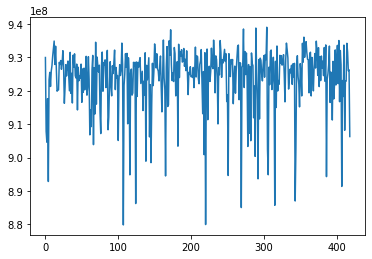

419 [811.57 629.82 767.68 684.62 744.71 776.47 704.49 666.09 796.76 741.99
 715.44 816.93 785.65 643.91 797.6  796.82 694.81 754.78 762.31 827.54
 800.25 795.16 779.01 794.89 744.27 792.74 726.46 733.89 761.32 787.79
 775.21 817.07 634.3  796.23 778.41 757.75 771.35 739.43 772.5  786.17
 769.31 714.6  677.08 786.93 797.28 758.48 766.46 815.61 779.95 770.04
 790.17 711.52 700.47 782.84 750.4  783.2  781.65 757.08 782.84 730.09
 816.47 708.19 768.94 739.64 720.23 786.22 721.   809.84 692.31 755.52
 673.41 767.71 542.12 795.21 797.37 738.17 757.56 751.39 807.14 777.17
 731.72 779.9  723.25 793.19 791.92 814.27 763.41 673.42 768.84 726.82
 800.56 797.83 788.14 778.89 773.22 802.49 670.99 664.24 786.03 741.3
 734.45 668.29 768.31 722.33 766.34 807.2  754.1  701.37 772.57 792.44
 798.15 766.28 778.77 733.5  805.11 821.07 770.37 775.67 791.26 738.42
 730.86 771.81 796.65 728.01 739.59 711.7  808.33 812.98 787.52 764.25
 771.4  799.43 782.44 688.14 715.76 742.   786.02 785.73 632.8  772.4
 726

In [179]:
T = np.array(data['TotalEsr%'].apply(lambda d: np.mean([float(x) for x in d.split('#')[:-1]])))
D = np.array(data['Dnbnumber'])
TD = T * D
B = np.array(data['BIC'].apply(lambda d: np.mean([float(x) for x in d.split('#')[:-1]])))
G = np.array(data['accGRR'].apply(lambda d: np.mean([float(x) for x in d.split('#')[:-1]])))
S = np.array(data['SNR'].apply(lambda d: np.mean([float(x) for x in d.split('#')[:-1]])))
F = np.array(data['FIT'].apply(lambda d: np.mean([float(x) for x in d.split('#')[:-1]])))
Y = np.array(data['Reads(M)'])

plt.plot(list(range(419)), D)
plt.show()
print(len(IDs), Y, len(Y))

training_set = np.c_[TD, B, G, S, F]

In [164]:
# fit_intercept 是否需要截距
# normalize X 是否需要规范化
model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(training_set, Y)
model.score(training_set, Y)

0.9622140083086946

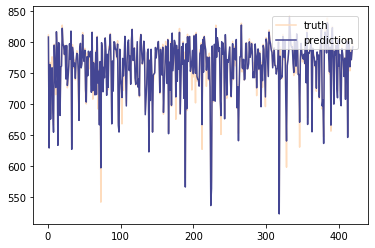

<Figure size 648x1152 with 0 Axes>

In [168]:
plt.plot(np.arange(1, 420), Y, label='truth', color='#fedcbd')
plt.plot(np.arange(1, 420), model.predict(training_set), label='prediction', color='#444693')
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=1.)
plt.figure(figsize=(9, 16))
plt.show()

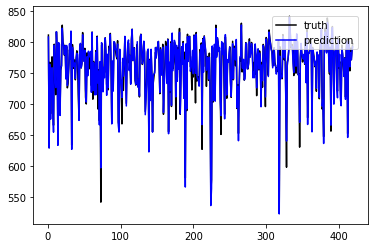

<Figure size 648x1152 with 0 Axes>

In [161]:
plt.plot(np.arange(1, 420), Y, label='truth', color='black')
plt.plot(np.arange(1, 420), model.predict(training_set), label='prediction', color='blue')
plt.legend(bbox_to_anchor=(1, 1), loc=1, borderaxespad=1.)
plt.figure(figsize=(9, 16))
plt.show()

In [178]:
model.predict(training_set)
b = model.intercept_
bs = model.coef_.tolist()
print([b] + bs)

[-401.80783203514, 9.143008194183928e-07, 4.436587253823394, -26.430362527326583, 0.7044229541833672, 44.41372435663572]
